In [1]:
#!pip install -q xplique

## Build the Use Case
We will follow the Tensorflow Tutorial from here

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

### DNN Regression
It is now time to implements single-input and multiple-inputs DNN models

In [11]:
print('---------------------------------------------------------------------------------')
print('Initializing DNN program')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------
# Importing Libraries

print('---------------------------------------------------------------------------------')
print('Importing Libraries')
print('---------------------------------------------------------------------------------')
print('')

import time
import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping
#from keras.preprocessing import sequence
#from keras.utils import pad_sequences
#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import shap
np.random.seed(0)

#---------------------------------------------------------------------
# Defining metric equations

print('---------------------------------------------------------------------------------')
print('Defining Metric Equations')
print('---------------------------------------------------------------------------------')
print('')

def ACC(TP,TN,FP,FN):
    Acc = (TP+TN)/(TP+FP+FN+TN)
    return Acc
def ACC_2 (TP, FN):
    ac = (TP/(TP+FN))
    return ac
def PRECISION(TP,FP):
    Precision = TP/(TP+FP)
    return Precision
def RECALL(TP,FN):
    Recall = TP/(TP+FN)
    return Recall
def F1(Recall, Precision):
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return F1
def BACC(TP,TN,FP,FN):
    BACC =(TP/(TP+FN)+ TN/(TN+FP))*0.5
    return BACC
def MCC(TP,TN,FP,FN):
    MCC = (TN*TP-FN*FP)/(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**.5)
    return MCC
def AUC_ROC(y_test_bin,y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_avg = 0
    counting = 0
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     # plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
      #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
      auc_avg += auc(fpr[i], tpr[i])
      counting = i+1
    return auc_avg/counting
#---------------------------------------------------------------------
# Defining features of interest
print('---------------------------------------------------------------------------------')
print('Defining features of interest')
print('---------------------------------------------------------------------------------')
print('')

req_cols = ['FLOW_DURATION_MILLISECONDS','FIRST_SWITCHED',
            'TOTAL_FLOWS_EXP','TCP_WIN_MSS_IN','LAST_SWITCHED',
            'TCP_WIN_MAX_IN','TCP_WIN_MIN_IN','TCP_WIN_MIN_OUT',
           'PROTOCOL','TCP_WIN_MAX_OUT','TCP_FLAGS',
            'TCP_WIN_SCALE_OUT','TCP_WIN_SCALE_IN','SRC_TOS',
            'DST_TOS','FLOW_ID','L4_SRC_PORT','L4_DST_PORT',
           'MIN_IP_PKT_LEN','MAX_IP_PKT_LEN','TOTAL_PKTS_EXP',
           'TOTAL_BYTES_EXP','IN_BYTES','IN_PKTS','OUT_BYTES','OUT_PKTS',
            'ALERT']
#---------------------------------------------------------------------
#Load Databases from csv file
print('---------------------------------------------------------------------------------')
print('Loading Databases')
print('---------------------------------------------------------------------------------')
print('')

print('Loading Database')
print('--------------------------------------------------')

#Denial of Service
df0 = pd.read_csv ('sensor_db/dos-03-15-2022-15-44-32.csv', usecols=req_cols)
df1 = pd.read_csv ('sensor_db/dos-03-16-2022-13-45-18.csv', usecols=req_cols)
df2 = pd.read_csv ('sensor_db/dos-03-17-2022-16-22-53.csv', usecols=req_cols)
df3 = pd.read_csv ('sensor_db/dos-03-18-2022-19-27-05.csv', usecols=req_cols)
df4 = pd.read_csv ('sensor_db/dos-03-19-2022-20-01-53.csv', usecols=req_cols)
df5 = pd.read_csv ('sensor_db/dos-03-20-2022-14-27-54.csv', usecols=req_cols)

#Normal
df7 = pd.read_csv  ('sensor_db/normal-03-15-2022-15-43-44.csv', usecols=req_cols)
df8 = pd.read_csv  ('sensor_db/normal-03-16-2022-13-44-27.csv', usecols=req_cols)
df9 = pd.read_csv  ('sensor_db/normal-03-17-2022-16-21-30.csv', usecols=req_cols)
df10 = pd.read_csv ('sensor_db/normal-03-18-2022-19-17-31.csv', usecols=req_cols)
df11 = pd.read_csv ('sensor_db/normal-03-18-2022-19-25-48.csv', usecols=req_cols)
df12 = pd.read_csv ('sensor_db/normal-03-19-2022-20-01-16.csv', usecols=req_cols)
df13 = pd.read_csv ('sensor_db/normal-03-20-2022-14-27-30.csv', usecols=req_cols)

#PortScanning
df14 = pd.read_csv  ('sensor_db/portscanning-03-15-2022-15-44-06.csv', usecols=req_cols)
df15 = pd.read_csv  ('sensor_db/portscanning-03-16-2022-13-44-50.csv', usecols=req_cols)
df16 = pd.read_csv  ('sensor_db/portscanning-03-17-2022-16-22-53.csv', usecols=req_cols)
df17 = pd.read_csv  ('sensor_db/portscanning-03-18-2022-19-27-05.csv', usecols=req_cols)
df18 = pd.read_csv  ('sensor_db/portscanning-03-19-2022-20-01-45.csv', usecols=req_cols)
df19 = pd.read_csv  ('sensor_db/portscanning-03-20-2022-14-27-49.csv', usecols=req_cols)

frames = [df0, df1, df2, df3, df4, df5, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]

fraction = 0.01 

#concat data frames
df = pd.concat(frames,ignore_index=True)

# shuffle the DataFrame rows
df = df.sample(frac = fraction)

y = df.pop('ALERT')
X = df

df_max_scaled = X
for col in df_max_scaled.columns:
    t = abs(df_max_scaled[col].max())
    df_max_scaled[col] = df_max_scaled[col]/t
df_max_scaled
df = df_max_scaled.assign( Label = y)
#df
df = df.fillna(0)

#---------------------------------------------------------------------

# Separate features and labels 
print('---------------------------------------------------------------------------------')
print('Separating features and labels')
print('---------------------------------------------------------------------------------')
print('')

y = df.pop('Label')
X = df
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
print('---------------------------------------------------------------------------------')
result_list = [counter['None'],counter['Denial of Service'], counter['Port Scanning']]
print('number of Labels  ',result_list)
print('---------------------------------------------------------------------------------')

df = X.assign( Label = y)

#---------------------------------------------------------------------

# Separate Training and Testing db
print('---------------------------------------------------------------------------------')
print('Separating Training and Testing db')
print('---------------------------------------------------------------------------------')
print('')

# y = df_train.pop('ALERT')
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .70
#print(df.head())

train, test = df[df['is_train']==True], df[df['is_train']==False]
print('Number of the training data:', len(train))
print('Number of the testing data:', len(test))

features = df.columns[:len(req_cols)-1]

y_train, label = pd.factorize(train['Label'])
y_test, label = pd.factorize(test['Label'])

#---------------------------------------------------------------------
# Defining the DNN model

print('---------------------------------------------------------------------------------')
print('Defining the DNN model')
print('---------------------------------------------------------------------------------')
print('')

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(len(req_cols)-1,)))
model.add(tf.keras.layers.Dense(len(req_cols)))
model.add(tf.keras.layers.Dense(len(req_cols)))
model.add(tf.keras.layers.Dense(7))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()
#---------------------------------------------------------------------

#Training Model

print('---------------------------------------------------------------------------------')
print('Training the model')
print('---------------------------------------------------------------------------------')
print('')


#print(train[features])
#print(y_train)
#START TIMER MODEL
start = time.time()
model.fit(train[features], y_train, epochs=5, batch_size=1024)
end = time.time()
print('---------------------------------------------------------------------------------')
print('ELAPSE TIME TRAINING MODEL: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------

loss_per_epoch = model.history.history['loss']
#print(plt.plot(range(len(loss_per_epoch)),loss_per_epoch))

#---------------------------------------------------------------------



---------------------------------------------------------------------------------
Initializing DNN program
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Importing Libraries
---------------------------------------------------------------------------------



/home/oarreche@ads.iu.edu/anaconda3/envs/HITL/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---------------------------------------------------------------------------------
Defining Metric Equations
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining features of interest
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Loading Databases
---------------------------------------------------------------------------------

Loading Database
--------------------------------------------------


---------------------------------------------------------------------------------
Separating features and labels
---------------------------------------------------------------------------------

Counter({'None': 195583, 'Denial of Service': 64475, 'Port Scanning': 41419})
---------------------------------------------------------------------------------
number of Labels   [195583, 64475, 41419]
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Separating Training and Testing db
---------------------------------------------------------------------------------

Number of the training data: 210849
Number of the testing data: 90628
---------------------------------------------------------------------------------
Defining the DNN model
---------------------------------------------------------------------------------

Model: "sequential"
__________________________________________

In [12]:

print('---------------------------------------------------------------------------------')
print('Model Prediction')
print('---------------------------------------------------------------------------------')
print('')
print('---------------------------------------------------------------------------------')
start = time.time()
y_pred = model.predict(test[features])
end = time.time()
print('ELAPSE TIME MODEL PREDICTION: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')

#print(y_pred)
ynew = np.argmax(y_pred,axis = 1)
#print(ynew)
score = model.evaluate(test[features], y_test,verbose=1)
#print(score)
pred_label = label[ynew]
#print(score)

#---------------------------------------------------------------------
# pd.crosstab(test['ALERT'], preds, rownames=['Actual ALERT'], colnames = ['Predicted ALERT'])

---------------------------------------------------------------------------------
Model Prediction
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------


ELAPSE TIME MODEL PREDICTION:  0.02605073849360148 min
---------------------------------------------------------------------------------

2833/2833 [==============================] - 3s 880us/step - loss: 5.8934


In [14]:
# dnn_model = build_and_compile_model()

In [15]:
dnn_model = model

In [16]:
%%time
train_features = train[features]
train_labels = y_train
history = model.fit(
#history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 24min 8s, sys: 5min 45s, total: 29min 54s
Wall time: 12min 12s


### Make predictions


In [19]:

test_features = test[features]
test_labels = y_test
#test_predictions = y_pred

In [23]:
vec = []
for i in range (len(test_labels)):
    for j in range(7):
        vec.append(test_labels[i])

test_labels = vec  

## Explain a Regression model (with Xplique)

We now have at our disposal a model trained for a regression task and we would like to use the Xplique library in order to have some highlights towards it. First, let's load this model and import the xplique library.

In [26]:
from xplique.attributions import (Saliency,
                             IntegratedGradients,
                             KernelShap,
                             Lime,
                             Occlusion,
                             SmoothGrad,
                             VarGrad,
                             SquareGrad,
                             GuidedBackprop,
                             DeconvNet,
                             GradientInput
)

In [30]:
inputs_tf, targets_tf = tf.cast(test_features, tf.float32), tf.cast(test_labels, tf.float32)
targets_tf = tf.expand_dims(targets_tf, axis=-1)
new_targets_tf = tf.ones((90628  ,1))

In [31]:
methods_params = [
    ("Saliency", Saliency, {}),
    ("Integrated Gradients", IntegratedGradients, {}),
    ("KernelShap", KernelShap, {}),
    ("Lime", Lime, {}),
    ("Occlusion", Occlusion, {"patch_size": 1, "patch_stride": 1}),
    ("SmoothGrad", SmoothGrad, {}),
    ("VarGrad", VarGrad, {}),
    ("SquareGrad", SquareGrad, {}),
    ("GuidedBackprop", GuidedBackprop, {}),
    ("DeconvNet", DeconvNet, {}),
    ("GradientInput", GradientInput, {})
]

In [32]:
# get the different explanations
explanations = []

for name, Cls, params in methods_params:

    explainer   = Cls(dnn_model, **params)
    explanation = explainer(inputs_tf, new_targets_tf)

    explanations.append((name, explanation))

Now we will have a look at our results

In [49]:

features_name = ['FLOW_DURATION_MILLISECONDS','FIRST_SWITCHED',
            'TOTAL_FLOWS_EXP','TCP_WIN_MSS_IN','LAST_SWITCHED',
            'TCP_WIN_MAX_IN','TCP_WIN_MIN_IN','TCP_WIN_MIN_OUT',
           'PROTOCOL','TCP_WIN_MAX_OUT','TCP_FLAGS',
            'TCP_WIN_SCALE_OUT','TCP_WIN_SCALE_IN','SRC_TOS',
            'DST_TOS','FLOW_ID','L4_SRC_PORT','L4_DST_PORT'
          ]

In [50]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular

In [51]:
test_features2 = test_features.values


### The mean impact for every sample

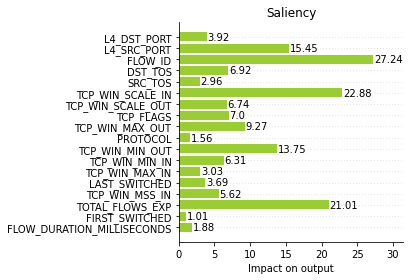

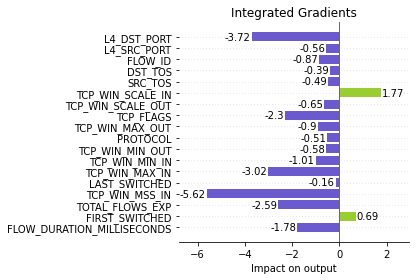

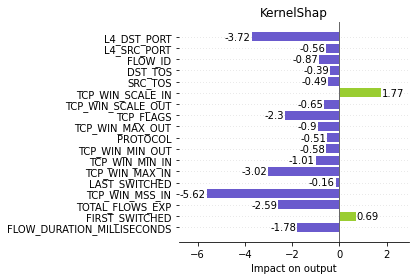

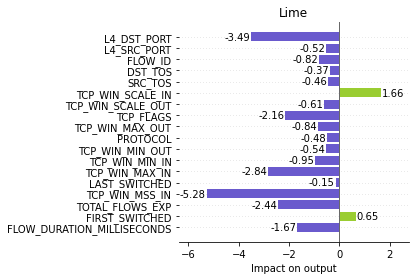

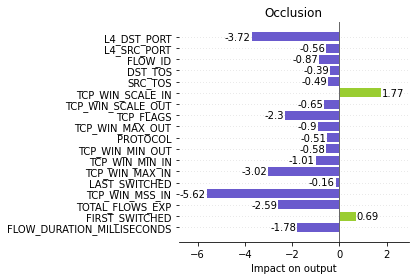

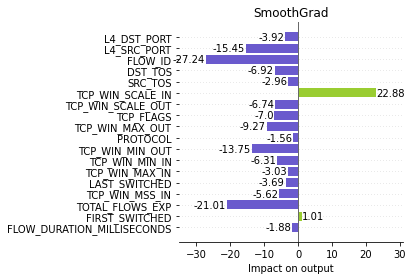

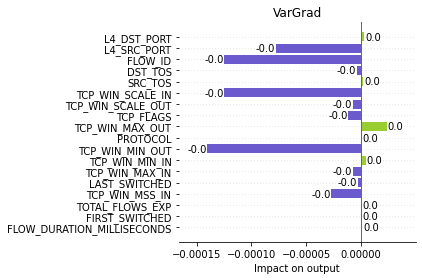

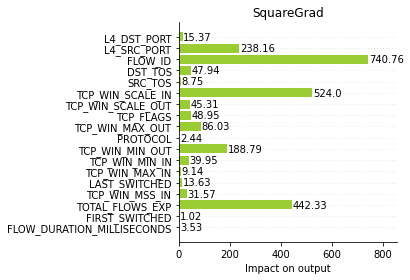

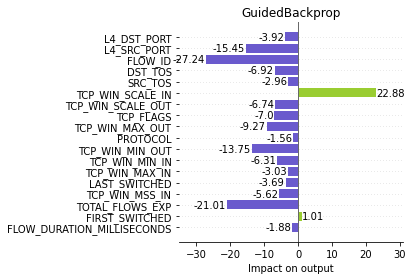

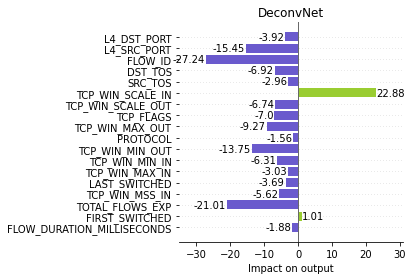

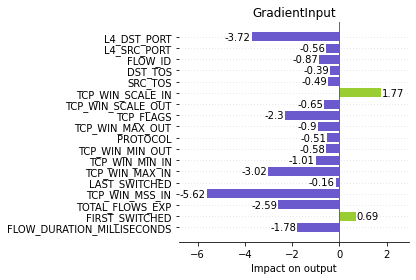

In [53]:
for exp_index, (exp_method, exp) in enumerate(explanations):
    plot_mean_feature_impact(exp, features_name)
    plt.title(exp_method)
    plt.show()